In [1]:
import math
import numpy as np
import pandas as pd
import joblib
from deepforest import CascadeForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('./data/training_set_2.csv',index_col=0)
# P=[1]*2412
# N=[0]*6961
# all=P+N
# data["label"]=all
data=data.sample(frac=1,random_state=1)
train,test=train_test_split(data,test_size=0.2,random_state=1)
train_x=train.drop(["label"],axis="columns")
train_y=train["label"]
test_x=test.drop(["label"],axis="columns")
test_y=test["label"]

In [3]:
def featureSet(data):
    data_num=len(data)
    Xlist=[]
    for row in range(0,data_num):
        tmp_list=[]
        for ii in range(len(data.columns)):
            tmp_list.append(data.iloc[row][data.columns[ii]])
        Xlist.append(tmp_list)
    return Xlist
train_x=featureSet(train_x)
y_train=train.label.values
train_x=np.array(train_x)
model = CascadeForestClassifier(random_state=1)
model.fit(train_x, y_train)
y_test_pred = model.predict(test_x)
y_test_pred=list(y_test_pred)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_test_pred)   


[2023-02-12 15:00:33.354] Start to fit the model:
[2023-02-12 15:00:33.402] Fitting cascade layer = 0 
[2023-02-12 15:04:32.719] layer = 0  | Val Acc = 89.111 % | Elapsed = 239.317 s
[2023-02-12 15:04:33.205] Fitting cascade layer = 1 
[2023-02-12 15:05:49.760] layer = 1  | Val Acc = 89.926 % | Elapsed = 76.555 s
[2023-02-12 15:05:49.770] Fitting cascade layer = 2 
[2023-02-12 15:07:06.357] layer = 2  | Val Acc = 90.028 % | Elapsed = 76.586 s
[2023-02-12 15:07:06.367] Fitting cascade layer = 3 
[2023-02-12 15:08:24.230] layer = 3  | Val Acc = 90.311 % | Elapsed = 77.863 s
[2023-02-12 15:08:24.240] Fitting cascade layer = 4 
[2023-02-12 15:09:45.091] layer = 4  | Val Acc = 90.458 % | Elapsed = 80.851 s
[2023-02-12 15:09:45.100] Fitting cascade layer = 5 
[2023-02-12 15:11:09.365] layer = 5  | Val Acc = 90.458 % | Elapsed = 84.265 s
[2023-02-12 15:11:09.365] Early stopping counter: 1 out of 2
[2023-02-12 15:11:09.376] Fitting cascade layer = 6 
[2023-02-12 15:12:34.705] layer = 6  | Val 

0.9167043911272069

In [4]:
accuracy_score(test_y,y_test_pred) 
newdata={"name":list(test_x.index),
         "true":list(test_y),
         "pre":list(y_test_pred)}
newdata=pd.DataFrame(newdata)
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"true"]==1:
        newdata.loc[i,"RBP"]="P"
    else:
        newdata.loc[i,"RBP"]="N"
newdata["ACC_MCC"]="NULL"
for i in newdata.index :
    if newdata.iloc[i,-2]=="P":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TP"
        else:
            newdata.iloc[i,-1]="FN"
    if newdata.iloc[i,-2]=="N":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TN"
        else:
            newdata.iloc[i,-1]="FP"
prediction= newdata["prediction"].values.tolist()
T_F=dict(zip(*np.unique(prediction, return_counts=True)))
count=T_F["T"]/len(prediction)
ACC_MCC_list= newdata["ACC_MCC"].values.tolist()
ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
TP=ACC_MCC["TP"]
TN=ACC_MCC["TN"]
FP=ACC_MCC["FP"]
FN=ACC_MCC["FN"]
ACC=(TP+TN)/(TP+TN+FN+FP)
MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
SN=TP/(TP+FN)
SP=TN/(TN+FP)
print(ACC,MCC,SN,SP)


0.9167043911272069 0.8309635349895355 0.8852459016393442 0.9416058394160584


In [5]:
import math
import numpy as np
import pandas as pd
import joblib
from deepforest import CascadeForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#scikit-learn==1.0.2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import rcParams
from pathlib import Path

[2023-02-12 15:33:40.980] Start to evalute the model:
[2023-02-12 15:33:41.378] Evaluating cascade layer = 0 
[2023-02-12 15:33:41.742] Evaluating cascade layer = 1 
[2023-02-12 15:33:42.095] Evaluating cascade layer = 2 
[2023-02-12 15:33:42.453] Evaluating cascade layer = 3 
[2023-02-12 15:33:42.800] Evaluating cascade layer = 4 
[2023-02-12 15:33:43.193] Evaluating cascade layer = 5 
[2023-02-12 15:33:43.541] Evaluating cascade layer = 6 


<Figure size 432x288 with 0 Axes>

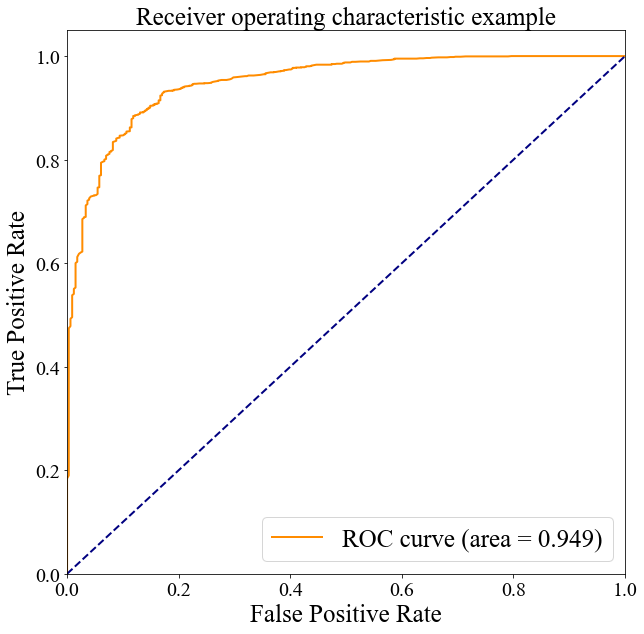

In [7]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()

    config = {
        "font.family":'serif',
        "font.size": 20,
        "mathtext.fontset":'stix',
        "font.serif": ['Times New Roman'],
    }
    rcParams.update(config)

    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.ylabel('True Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.title('Receiver operating characteristic example',font=Path('TNR.ttf'),fontsize=25)
    plt.legend(loc="lower right",fontsize=25)

    
    plt.show()
def featureSet(data):
    data_num=len(data)
    Xlist=[]
    for row in range(0,data_num):
        tmp_list=[]
        for ii in range(len(data.columns)):
            tmp_list.append(data.iloc[row][data.columns[ii]])
        Xlist.append(tmp_list)
    return Xlist
test_file="./data/independent_test.csv"
data_test=pd.read_csv(test_file,index_col=0)
# data_test["label"]="NULL"
# data_test.iloc[:1708,-1]=1
# data_test.iloc[1708:,-1]=0
test_indepent_x=data_test.drop(["label"],axis="columns")
test_indepent_y=data_test["label"]
test_indepent_y=test_indepent_y.astype(int)
# model.fit(train_x, y_train)
y_test_pred = model.predict_proba(test_indepent_x)[:, 1]
acu_curve(test_indepent_y,y_test_pred)

In [9]:
def Deep_forest_prediction(test_file):
    data_test=pd.read_csv(test_file,index_col=0)
    # data_test=data_test.T
    # data_test["label"]="NULL"
    # data_test.iloc[:1708,-1]=1
    # data_test.iloc[1708:,-1]=0
    test_indepent_x=data_test.drop(["label"],axis="columns")
    test_indepent_y=data_test["label"]
    test_indepent_y=test_indepent_y.astype(int)
    result = model.predict(test_indepent_x)
    result=list(result)
    for i in range(len(result)):
        if result[i]>0.5:
            result[i]=1
        if result[i]<=0.5:
            result[i]=0
    test_indepent_y=list(test_indepent_y)
    accuracy_score(test_indepent_y,result)  
    newdata_test={"name":list(test_indepent_x.index),
            "true":list(test_indepent_y),
            "pre":list(result)}
    newdata_test=pd.DataFrame(newdata_test)
    for i in newdata_test.index:
        if newdata_test.loc[i,"pre"]==newdata_test.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
            newdata_test.loc[i,"prediction"]="T"
        else:
            newdata_test.loc[i,"prediction"]="F"
    for i in newdata_test.index:
        if newdata_test.loc[i,"true"]==1:
            newdata_test.loc[i,"RBP"]="P"
        else:
            newdata_test.loc[i,"RBP"]="N"
    newdata_test["ACC_MCC"]="NULL"
    for i in newdata_test.index :
        if newdata_test.iloc[i,-2]=="P":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TP"
            else:
                newdata_test.iloc[i,-1]="FN"
        if newdata_test.iloc[i,-2]=="N":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TN"
            else:
                newdata_test.iloc[i,-1]="FP"
    prediction= newdata_test["prediction"].values.tolist()
    T_F=dict(zip(*np.unique(prediction, return_counts=True)))
    count=T_F["T"]/len(prediction)
    ACC_MCC_list= newdata_test["ACC_MCC"].values.tolist()
    ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
    TP=ACC_MCC["TP"]
    TN=ACC_MCC["TN"]
    FP=ACC_MCC["FP"]
    FN=ACC_MCC["FN"]
    ACC=(TP+TN)/(TP+TN+FN+FP)
    MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
    SN=TP/(TP+FN)
    SP=TN/(TN+FP)
    return ACC,MCC,SN,SP
test_file="./data/independent_test.csv"
ACC,MCC,SN,SP=Deep_forest_prediction(test_file)

[2023-02-12 15:34:56.945] Start to evalute the model:
[2023-02-12 15:34:57.343] Evaluating cascade layer = 0 
[2023-02-12 15:34:57.718] Evaluating cascade layer = 1 
[2023-02-12 15:34:58.068] Evaluating cascade layer = 2 
[2023-02-12 15:34:58.413] Evaluating cascade layer = 3 
[2023-02-12 15:34:58.783] Evaluating cascade layer = 4 
[2023-02-12 15:34:59.209] Evaluating cascade layer = 5 
[2023-02-12 15:34:59.570] Evaluating cascade layer = 6 


In [10]:
ACC,MCC,SN,SP

(0.8833759590792839, 0.6644641092110345, 0.8843788437884379, 0.878419452887538)